In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # using Gaussian Algorithm from Naive Bayes
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
739,1,102,74,0,0,39.5,0.293,42,1
201,1,138,82,0,0,40.1,0.236,28,0
177,0,129,110,46,130,67.1,0.319,26,1
484,0,145,0,0,0,44.2,0.630,31,1
609,1,111,62,13,182,24.0,0.138,23,0


In [9]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

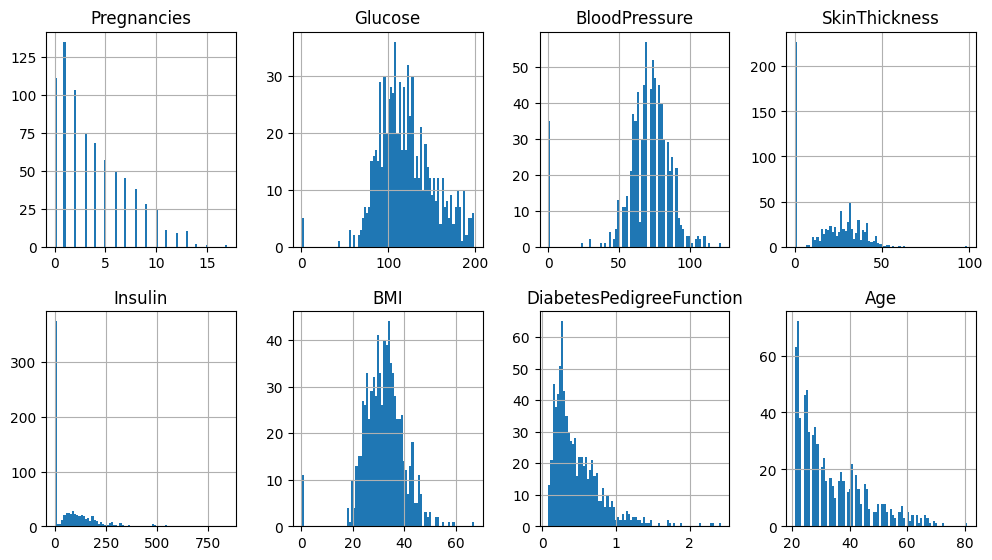

In [11]:
columns = list(df)[0:-1]
df[columns].hist(bins=80,figsize=(12,50), layout=(14,4))

## Identifying the correlation in b/w the columns

In [14]:
df.rename(columns = {'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP','SkinThickness': 'SkinTh'}, inplace = True) 

In [15]:
df.corr()

,Pregnancies,Glucose,BP,SkinTh,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinTh,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


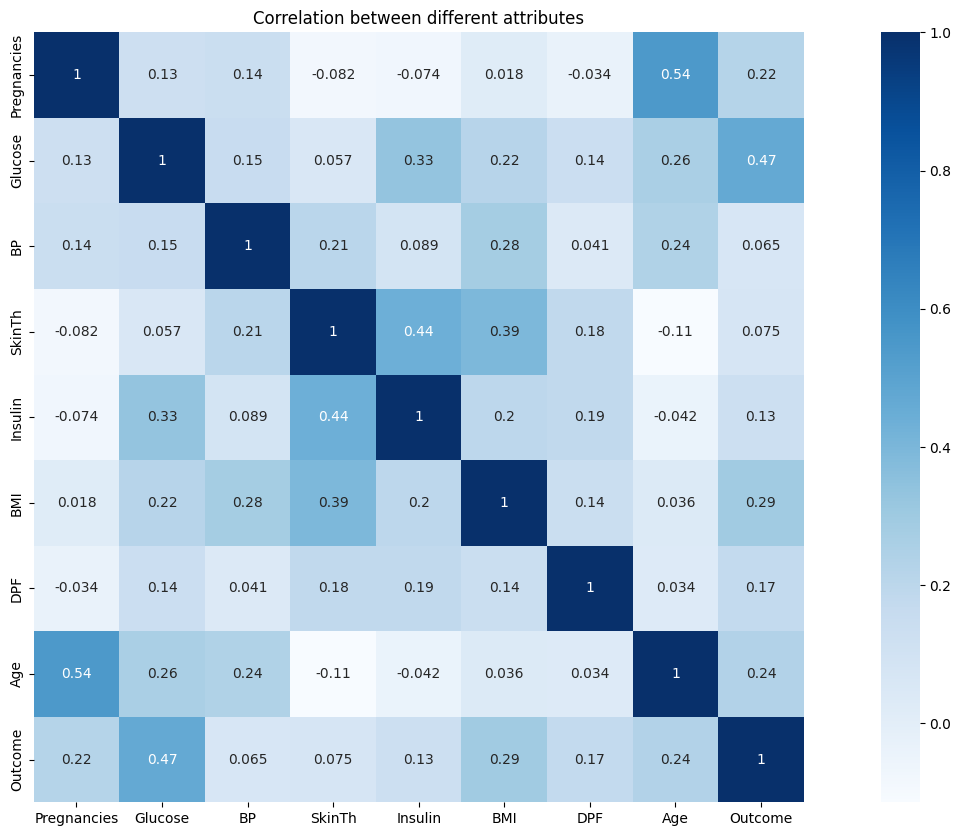

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='Blues')
plt.title('Correlation between different attributes')
plt.show()

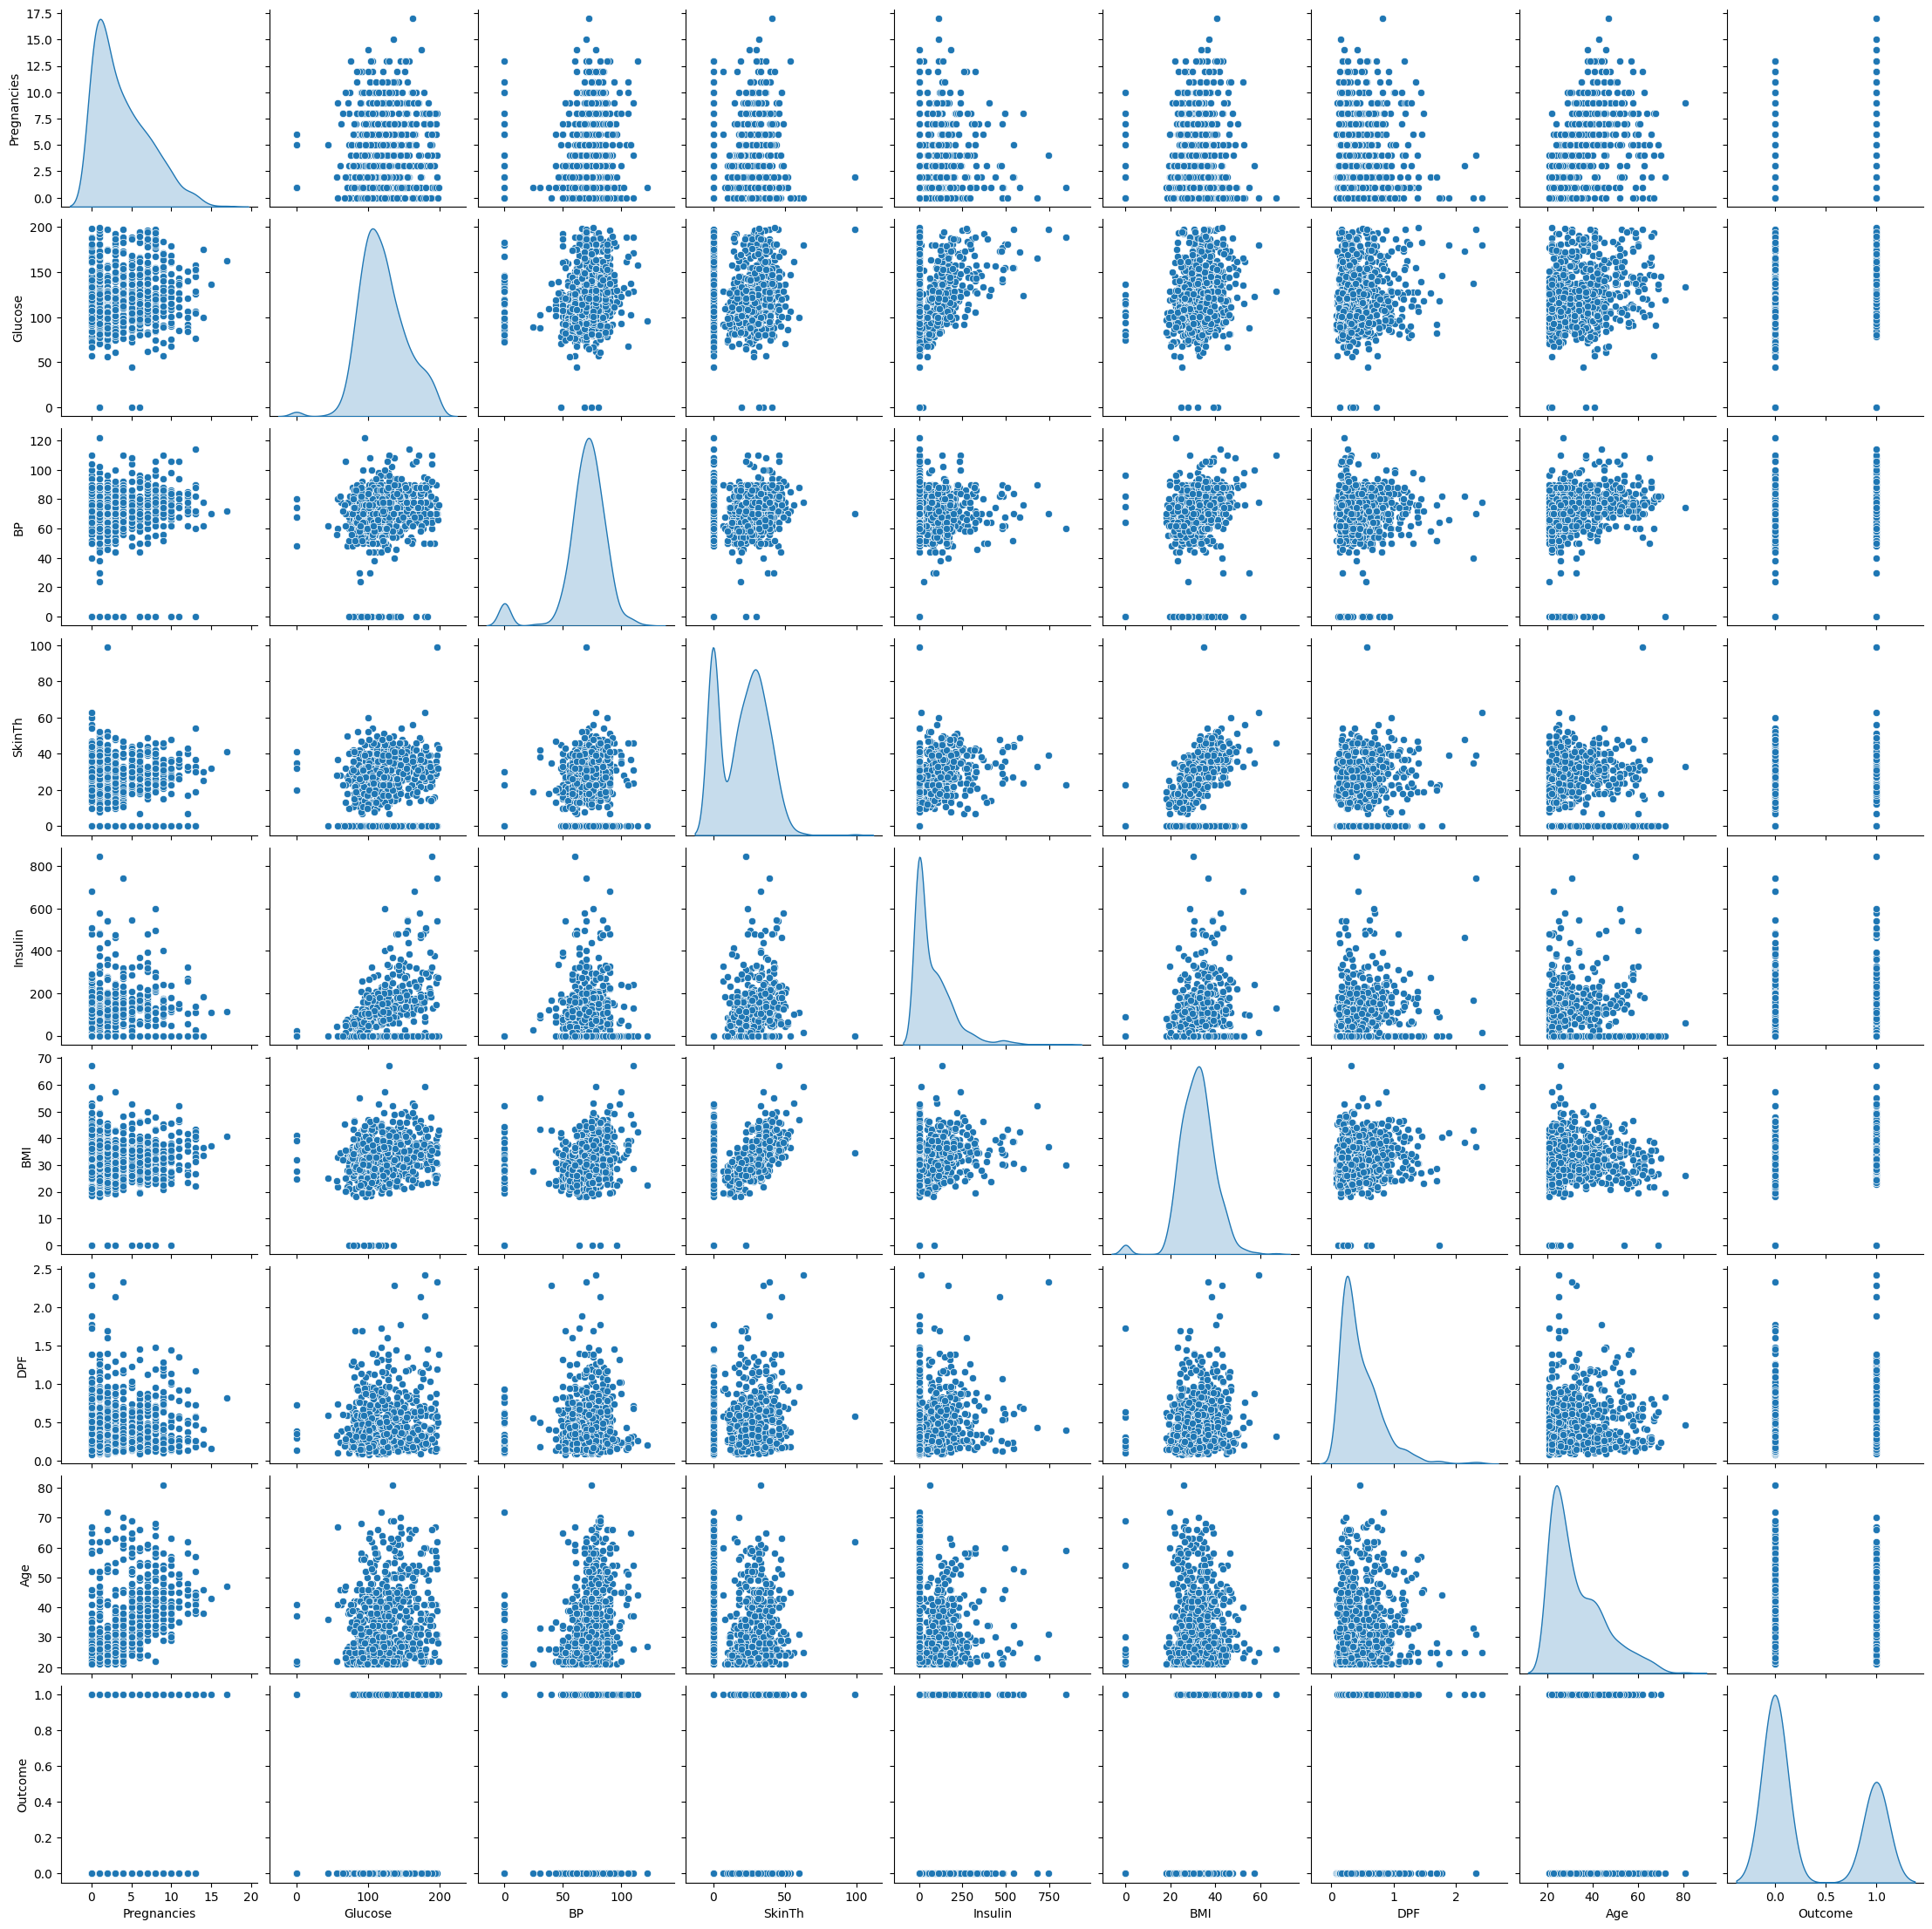

In [17]:
sns.pairplot(df,diag_kind='kde')

In [18]:
#target column value and their counts
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Training the data and Data Modeling

In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

### 1.Data Preparation - cleaning the data

In [26]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,537.0,3.757914,3.355361,0.000,1.00,3.000,6.000,15.000
Glucose,537.0,121.001862,31.244492,0.000,100.00,117.000,140.000,198.000
BP,537.0,68.951583,20.115002,0.000,62.00,72.000,80.000,122.000
SkinTh,537.0,19.541899,15.958044,0.000,0.00,21.000,32.000,99.000
Insulin,537.0,77.500931,112.715401,0.000,0.00,0.000,126.000,744.000
BMI,537.0,31.838920,7.675022,0.000,27.00,32.000,36.400,67.100
DPF,537.0,0.468156,0.333139,0.085,0.24,0.355,0.613,2.329
Age,537.0,33.312849,11.967574,21.000,24.00,29.000,41.000,72.000


In [27]:
# Creating the simple imputer to replace zeros with mean value
replace_ = SimpleImputer(missing_values=0, strategy='mean')

cols=X_train.columns

X_train = pd.DataFrame(replace_.fit_transform(X_train))
X_test = pd.DataFrame(replace_.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

In [28]:
X_train.head()

,Pregnancies,Glucose,BP,SkinTh,Insulin,BMI,DPF,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


### 2.Creating the logistic regression model

In [30]:
model = LogisticRegression(solver='liblinear')
# Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
# 1. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
# 2. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
# ‘liblinear’ is limited to one-versus-rest schemes.
model.fit(X_train,y_train)
print(model.coef_, model.intercept_)

[[ 1.24256825e-01  2.63208521e-02 -2.93938264e-02 -1.23088674e-02
  -8.18795945e-05  7.40047944e-02  3.46766736e-01  1.26949460e-02]] [-4.97583008]


### 3.Making prediction of Test Data

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [35]:
model_score = model.score(X_test,y_test)
print("The model score is {}". format(model_score))

The model score is 0.7792207792207793


Text(0.5, 1.0, 'Confusion Matrix')

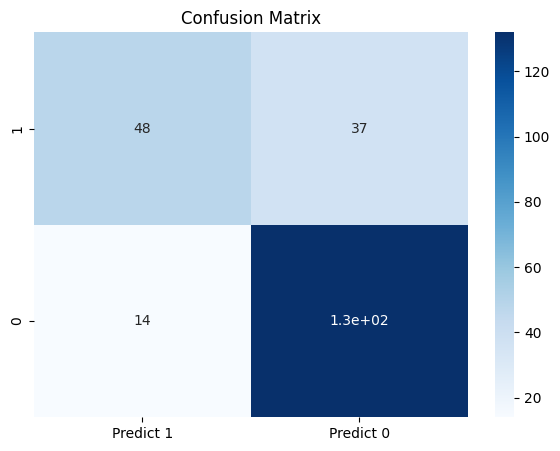

In [36]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(conf_matrix, index= [i for i in ['1','0']], 
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True, cmap='Blues')
plt.title("Confusion Matrix")

In [37]:
# 48(TP)+132(TN)=180 samples --> correct
#37(FP)+14(FN)=51 samples --> incorrect

### 4.NB model

In [39]:
model = GaussianNB() 
model.fit(X_train,y_train) 

,priors,None
,var_smoothing,1e-09


In [45]:
#training data prediction
train_y_pred = model.predict(X_train)
train_y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [46]:
model_score = metrics.accuracy_score(y_train,train_y_pred)
print("The model Accuracy is {0:.4f}". format(model_score))

The model Accuracy is 0.7393


In [47]:
#testing data prediction
test_y_pred = model.predict(X_test)
test_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [48]:
model_score = metrics.accuracy_score(y_test,test_y_pred)
print("The model Accuracy is {0:.4f}". format(model_score))

The model Accuracy is 0.7706


Text(0.5, 1.0, 'Confusion Matrix')

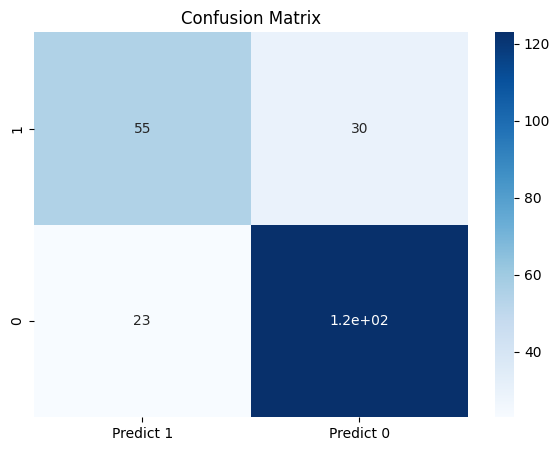

In [49]:
conf_matrix = metrics.confusion_matrix(y_test, test_y_pred, labels=[1,0])

df_cm = pd.DataFrame(conf_matrix, index= [i for i in ['1','0']], 
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True, cmap='Blues')
plt.title("Confusion Matrix")

## Classification Model 

In [51]:
print('Classification Report')
print(metrics.classification_report(y_test,test_y_pred,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

